<a href="https://colab.research.google.com/github/felipeccoutinho/Data-Science/blob/main/Acidentes_de_Tr%C3%A2nsito_em_Recife_2017_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<h1>Um estudo sobre acidentes de trânsito no Recife entre os anos de 2017 e 2020</h1>**
por Felipe César Coutinho

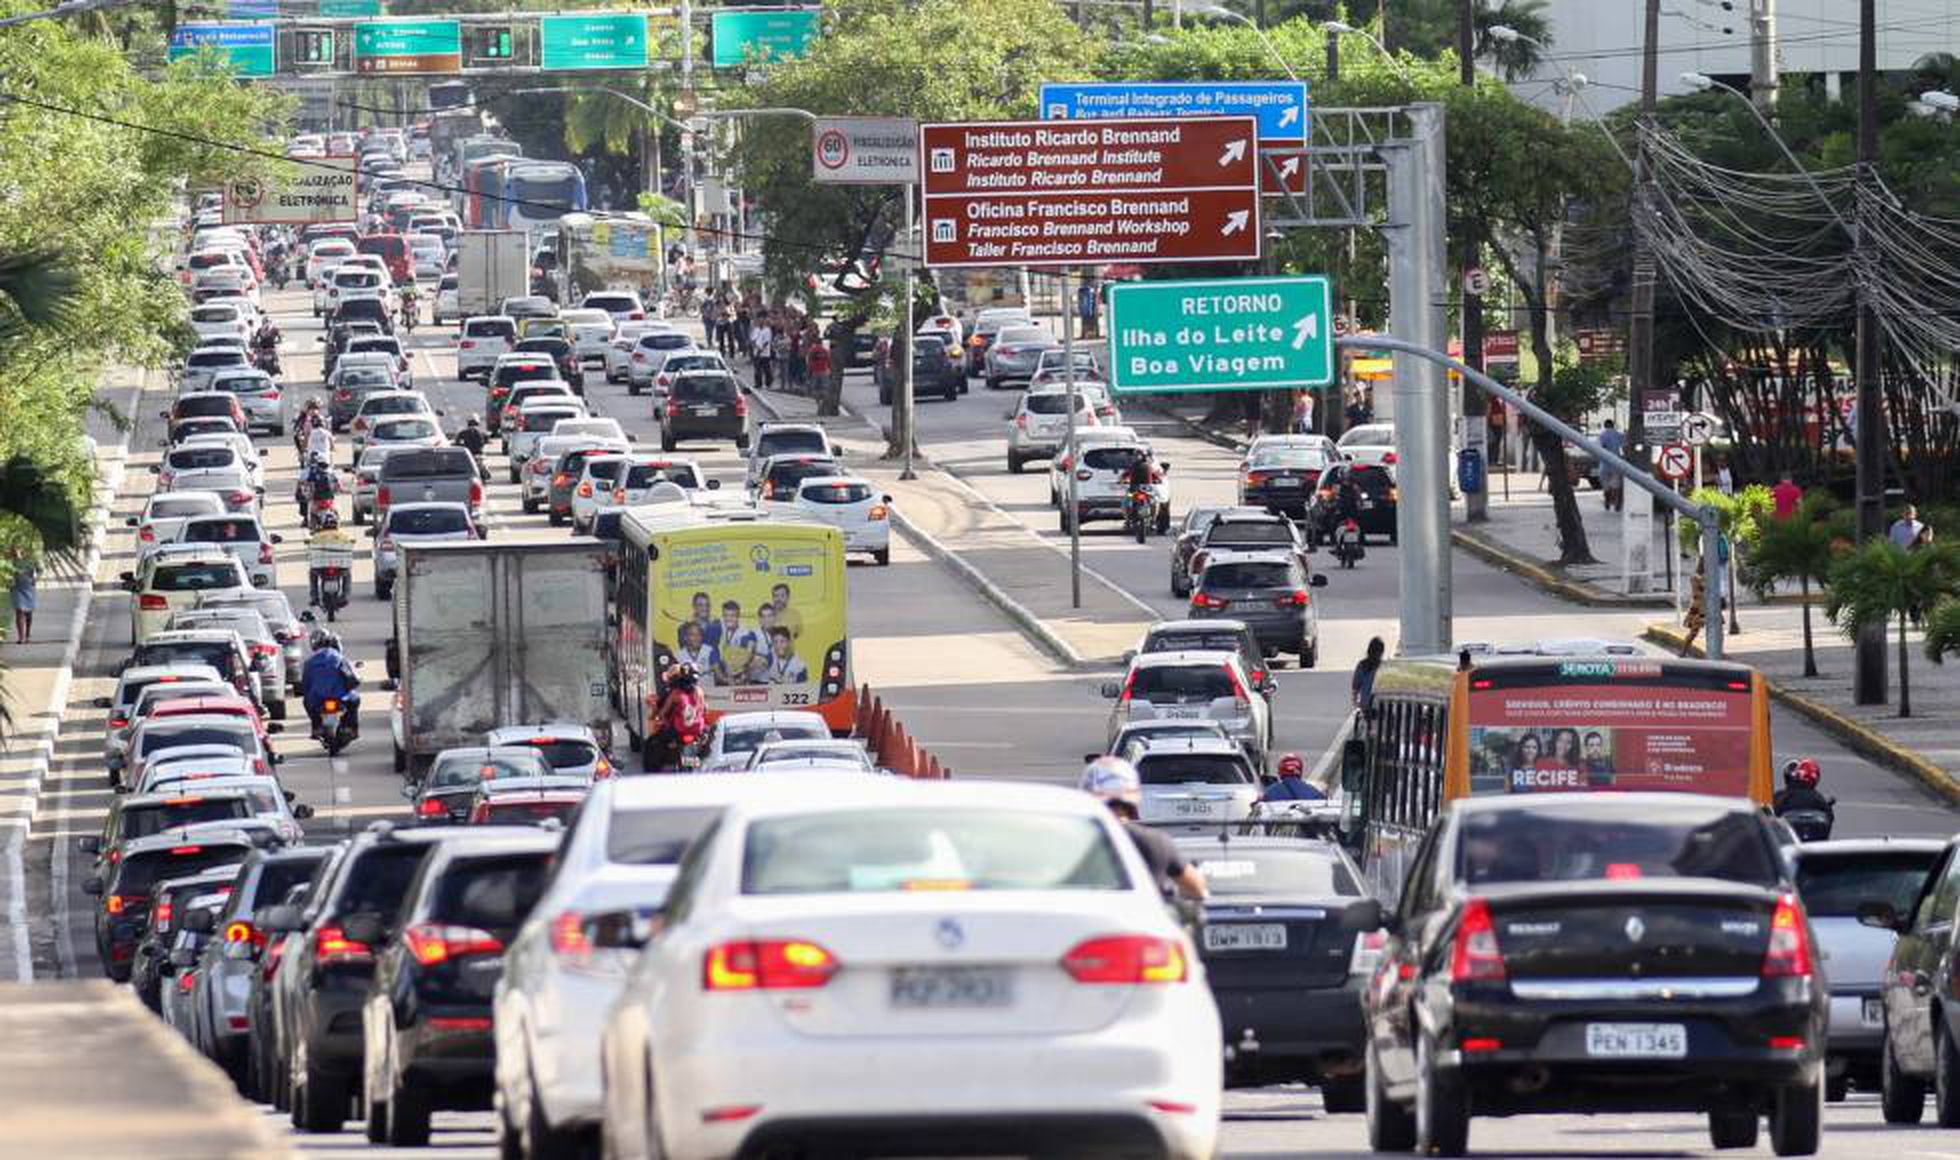


**<h2> Um pouco sobre o Recife </h2>**

<p align="justify">Capital do estado de Pernambuco, localizada na Mesorregião Metropolitana (Microrregião de Recife). É sede da Região Metropolitana do Recife, maior aglomeração urbana do Norte-Nordeste e quinta maior do Brasil, com 3,7 milhões de habitantes.</p>

<p align="justify">Segundo pesquisa da Federação das Indústrias do Estado do Rio de Janeiro – FIRJAN, o Recife é a segunda capital do Norte-Nordeste a apresentar a melhor qualidade de vida. Cidade que se destaca por promover um bom ambiente de inovação. Com investimentos crescentes em infraestrutura, o Recife já conta com um dos mais modernos aeroportos do Brasil, que atualmente encontra-se em reforma, acompanhando as grandes mudanças estruturais que o estado vem passando, ampliando e aprimorando, assim, seus serviços; porto marítimo para transporte de cargas e pessoas. Para melhoria da mobilidade urbana, ações como as obras dos corredores Norte/Sul e Leste/Oeste estão em pleno vapor. Os corredores ligarão a capital pernambucana a alguns dos principais municípios que fazem parte da sua Região Metropolitana privilegiando, desta forma, o transporte coletivo.</p>

<p align="justify">O município tem uma área territorial de 218,843 km² e uma população estimada de 1.653.461 pessoas. A frota de veiculos em Recife chegou ao patamar de 712.344 em 2020.</p>

<p align="justify">A população economicamente ativa tem uma renda per capita média de R$ 1.144,26. A expectativa de vida da população é de 74,5 anos e IDHM educação de 0,698. </p>

 


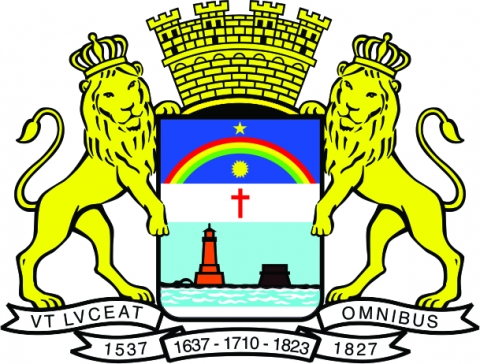


**<h2> Sobre o estudo </h2>**

<p align="justify">Na apresentação, será utilizado dados abertos disponibilizados pela Prefeitura da Cidade do Recife. Tais arquivos conterão informações sobre ocorrências de acidentes de trânsito por ano. Você pode acessar dados mais atualizados visitando o portal de Dados Abertos da Prefeitura do Recife. <a>http://dados.recife.pe.gov.br </a> </p> 

Para este estudo, utilizarei de quatro datasets:

- Acidentes_2017.xlsx
- Acidentes_2018.xlsx
- Acidentes_2019.xlsx
- Acidentes_2020.xlsx

Os datasets possuem dados sobre ocorrências registrada em cada ano. Data, hora, natureza acidente, bairro, vítimas e vítimas fatais serão encontrados nesse conjunto de dados.



**<h2> Objetivo do estudo </h2>**

O objetivo desse estudo é gerar insights e responder as seguintes perguntas:

- Quantos acidentes de trânsito ocorreram em cada ano na capital pernambucana?

- Quantos acidentes de trânsito tiveram na cidade do Recife com viítimas?

- Quantos acidentes de trânsito entre 2017 e 2020 ocorreram com vítimas fatais?

- Qual o período do dia (manhã, tarde, noite ou madrugada) em que ocorreram mais acidentes de trânsito?

- Qual o tipo de acidente mais comum ocorreu no período?


<h3>Importando bibliotecas</h3>




In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
 

df_2017 = pd.read_excel('https://raw.githubusercontent.com/felipeccoutinho/Data-Science/main/acidentes_2017.xlsx')
df_2018 = pd.read_excel('https://raw.githubusercontent.com/felipeccoutinho/Data-Science/main/acidentes_2018.xlsx')
df_2019 = pd.read_excel('https://raw.githubusercontent.com/felipeccoutinho/Data-Science/main/acidentes_2019.xlsx')
df_2020 = pd.read_excel('https://raw.githubusercontent.com/felipeccoutinho/Data-Science/main/acidentes_2020.xlsx')
 

**<h3>Construção e leitura do dataset</h3>**

In [3]:
#unir todas as tabelas em um único dataset
df_2017_2018 = pd.merge(df_2017, df_2018, how="outer")
df_2019_2020 = pd.merge(df_2019, df_2020, how="outer")
df = pd.merge(df_2017_2018, df_2019_2020, how="outer")
df.head()

,data,hora,natureza_acidente,situacao,bairro,endereco,numero,detalhe_endereco_acidente,complemento,tipo,auto,moto,ciclom,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimasfatais
0,2017-01-01,02:55:00,SEM VÍTIMA,CANCELADA,CABANGA,AV SUL,NaN,NaN,SEMAFORO 260,COLISÃO,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN
1,2017-01-01,05:32:00,SEM VÍTIMA,FINALIZADA,SANTO AMARO,RUA BARROS BARRETO,483,NaN,PROX DO COLEGIO ESTACIO COIMBRA,CAPOTAMENTO,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,2017-01-01,06:00:00,SEM VÍTIMA,FINALIZADA,JARDIM SÃO PAULO,AV PIRACICABA,NaN,NaN,NO TERMINAL DOS ONIBUS JARDIM SAO PAULO PIRACICA,COLISÃO,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN
3,2017-01-01,06:24:00,SEM VÍTIMA,FINALIZADA,JARDIM SÃO PAULO,AV SAO PAULO,474,NaN,EM FRENTE AO SHOPPING JARDIM,COLISÃO,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,2017-01-01,06:39:00,SEM VÍTIMA,PENDENTE,CAXANGÁ,AV CAXANGA,NaN,NaN,EM DA INTEGRAÇÃO DA CAXANGÁ,COLISÃO,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN


In [4]:
# tamanho após a união das tabelas 2017, 2018, 2019 e 2020
df.shape

(39323, 21)

In [5]:
# verificando os tipos das variáveis
df.dtypes

data                         datetime64[ns]
hora                                 object
natureza_acidente                    object
situacao                             object
bairro                               object
endereco                             object
numero                               object
detalhe_endereco_acidente            object
complemento                          object
tipo                                 object
auto                                float64
moto                                float64
ciclom                              float64
ciclista                            float64
pedestre                            float64
onibus                              float64
caminhao                            float64
viatura                             float64
outros                              float64
vitimas                             float64
vitimasfatais                       float64
dtype: object

**<h3>Limpeza de Dados — Data Cleaning</h3>**

In [6]:
# verificando os dados que são nulos
df.isnull().sum().sort_values(ascending=False)

vitimasfatais                39212
ciclom                       39118
outros                       38849
viatura                      38827
ciclista                     38653
pedestre                     38435
caminhao                     35439
onibus                       33493
detalhe_endereco_acidente    31035
moto                         29231
numero                       20329
auto                          3615
complemento                   3421
natureza_acidente              274
bairro                         217
vitimas                        111
endereco                       101
situacao                        52
hora                            49
tipo                             1
data                             0
dtype: int64

In [8]:
# deletando dados  nulos em algumas colunas
df.dropna(subset=['tipo', 'hora', 'situacao', 'endereco', 'vitimas', 'bairro', 'natureza_acidente'], inplace=True)

In [9]:
df.isnull().sum().sort_values(ascending=False)

vitimasfatais                38524
ciclom                       38374
outros                       38105
viatura                      38089
ciclista                     37918
pedestre                     37716
caminhao                     34763
onibus                       32890
detalhe_endereco_acidente    30426
moto                         28630
numero                       19875
auto                          3500
complemento                   3344
tipo                             0
vitimas                          0
endereco                         0
bairro                           0
situacao                         0
natureza_acidente                0
hora                             0
data                             0
dtype: int64

In [10]:
# Para os demais dados que são do tipo float e possuem dados ausentes, será atribuido o valor de 0 
df.fillna(0, inplace=True)
df.isnull().sum().sort_values(ascending=False)

vitimasfatais                0
tipo                         0
hora                         0
natureza_acidente            0
situacao                     0
bairro                       0
endereco                     0
numero                       0
detalhe_endereco_acidente    0
complemento                  0
auto                         0
vitimas                      0
moto                         0
ciclom                       0
ciclista                     0
pedestre                     0
onibus                       0
caminhao                     0
viatura                      0
outros                       0
data                         0
dtype: int64

In [11]:
# novo tamanho do dataframe
df.shape

(38572, 21)

In [12]:
df.head()

,data,hora,natureza_acidente,situacao,bairro,endereco,numero,detalhe_endereco_acidente,complemento,tipo,auto,moto,ciclom,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimasfatais
0,2017-01-01,02:55:00,SEM VÍTIMA,CANCELADA,CABANGA,AV SUL,0,0,SEMAFORO 260,COLISÃO,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2017-01-01,05:32:00,SEM VÍTIMA,FINALIZADA,SANTO AMARO,RUA BARROS BARRETO,483,0,PROX DO COLEGIO ESTACIO COIMBRA,CAPOTAMENTO,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2017-01-01,06:00:00,SEM VÍTIMA,FINALIZADA,JARDIM SÃO PAULO,AV PIRACICABA,0,0,NO TERMINAL DOS ONIBUS JARDIM SAO PAULO PIRACICA,COLISÃO,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2017-01-01,06:24:00,SEM VÍTIMA,FINALIZADA,JARDIM SÃO PAULO,AV SAO PAULO,474,0,EM FRENTE AO SHOPPING JARDIM,COLISÃO,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2017-01-01,06:39:00,SEM VÍTIMA,PENDENTE,CAXANGÁ,AV CAXANGA,0,0,EM DA INTEGRAÇÃO DA CAXANGÁ,COLISÃO,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<p align="justify">Será criado três colunas (uma coluna chamada ano, outra coluna chamada hora_acidente e a outra chamada de período). A coluna período será dividida em quatro grupos de acordo com a hora do acidente.
</p>

1.   manhã = 06:00 as 11:59 
2.   tarde = 12:00 as 17:59
3.   noite = 18:00 as 23:59
4.   madrugada = 00:00 as 05:59








In [56]:
# Será criado três colunas (uma coluna chamada ano, outra coluna chamada hora_acidente e a outra chamada de período)
df['ano'] = df['data'].apply(lambda x: str(x)[:4])
df['hora_acidente'] = df['hora'].apply(lambda x: str(x)[:2])

df["periodo"] =  df["hora_acidente"].replace({"06": "MANHÃ", "07": "MANHÃ", "08": "MANHÃ", "09": "MANHÃ", "10": "MANHÃ", "11": "MANHÃ",
                                              "12": "TARDE", "13": "TARDE", "14": "TARDE", "15": "TARDE", "16": "TARDE", "17": "TARDE",  
                                              "18": "NOITE", "19": "NOITE", "20": "NOITE", "21": "NOITE", "22": "NOITE", "23": "NOITE",
                                              "00": "MADRUGADA", "01": "MADRUGADA", "02": "MADRUGADA", "03": "MADRUGADA", "04": "MADRUGADA", "05": "MADRUGADA"})
df.head()

,data,hora,natureza_acidente,situacao,bairro,endereco,numero,detalhe_endereco_acidente,complemento,tipo,auto,moto,ciclom,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimasfatais,ano,hora_acidente,periodo
1,2017-01-01,05:32:00,SEM VÍTIMA,FINALIZADA,SANTO AMARO,RUA BARROS BARRETO,483,0,PROX DO COLEGIO ESTACIO COIMBRA,CAPOTAMENTO,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,05,MADRUGADA
2,2017-01-01,06:00:00,SEM VÍTIMA,FINALIZADA,JARDIM SÃO PAULO,AV PIRACICABA,0,0,NO TERMINAL DOS ONIBUS JARDIM SAO PAULO PIRACICA,COLISÃO,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2017,06,MANHÃ
3,2017-01-01,06:24:00,SEM VÍTIMA,FINALIZADA,JARDIM SÃO PAULO,AV SAO PAULO,474,0,EM FRENTE AO SHOPPING JARDIM,COLISÃO,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,06,MANHÃ
5,2017-01-01,07:25:00,SEM VÍTIMA,FINALIZADA,BOMBA DO HEMETÉRIO,RUA BOMBA DO HEMETERIO,630,0,E/F A FARMACIA NOVA JERUSALÉM,COLISÃO,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,07,MANHÃ
6,2017-01-01,08:48:00,SEM VÍTIMA,FINALIZADA,PINA,AV HERCULANO BANDEIRA,97,0,E/F AO BAR HERCULANO,COLISÃO,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2017,08,MANHÃ


In [57]:
df['tipo'].unique()

array(['CAPOTAMENTO', 'COLISÃO', 'ENGAVETAMENTO', 'ATROPELAMENTO',
       'COLISÃO COM CICLISTA', 'CHOQUE', 'ACID. DE PERCURSO',
       'ATROPELAMENTO ANIMAL', 'TOMBAMENTO', 'COLISAO',
       'ABALROAMENTO LONGITUDINAL', 'COLISÃO TRASEIRA',
       'CHOQUE VEÍCULO PARADO', 'ABALROAMENTO TRANSVERSAL',
       'COLISÃO FRONTAL', 'CHOQUE OBJETO FIXO'], dtype=object)

In [58]:
df.drop(df.loc[df['tipo']==0].index, inplace=True)

In [59]:
df['tipo'].unique()

array(['CAPOTAMENTO', 'COLISÃO', 'ENGAVETAMENTO', 'ATROPELAMENTO',
       'COLISÃO COM CICLISTA', 'CHOQUE', 'ACID. DE PERCURSO',
       'ATROPELAMENTO ANIMAL', 'TOMBAMENTO', 'COLISAO',
       'ABALROAMENTO LONGITUDINAL', 'COLISÃO TRASEIRA',
       'CHOQUE VEÍCULO PARADO', 'ABALROAMENTO TRANSVERSAL',
       'COLISÃO FRONTAL', 'CHOQUE OBJETO FIXO'], dtype=object)

In [60]:
df['situacao'].unique()

array(['FINALIZADA'], dtype=object)

Será considerado para o estudo apenas os casos com situação "FINALIZADA".

In [61]:
# será considerado para o estudo apenas os casos FINALIZADOS
df.drop(df.loc[df['situacao']=='CANCELADA'].index, inplace=True)
df.drop(df.loc[df['situacao']=='DUPLICIDADE'].index, inplace=True)
df.drop(df.loc[df['situacao']=='EM ABERTO'].index, inplace=True)
df.drop(df.loc[df['situacao']=='EM ATENDIMENTO'].index, inplace=True)
df.drop(df.loc[df['situacao']=='EQUIPE EM DESLOCAMENTO'].index, inplace=True)
df.drop(df.loc[df['situacao']=='EQUIPE NO LOCAL'].index, inplace=True)
df.drop(df.loc[df['situacao']=='PENDENTE'].index, inplace=True)

In [62]:
df['situacao'].unique()

array(['FINALIZADA'], dtype=object)

In [63]:
df['bairro'].unique()

array(['SANTO AMARO', 'JARDIM SÃO PAULO', 'BOMBA DO HEMETÉRIO', 'PINA',
       'ÁGUA FRIA', 'PARNAMIRIM', 'SANCHO', 'IMBIRIBEIRA',
       'VASCO DA GAMA', 'ESTÂNCIA', 'ARRUDA', 'CAMPO GRANDE', 'AFOGADOS',
       'PAISSANDU', 'MADALENA', 'BOA VIAGEM', 'CORDEIRO', 'JORDÃO',
       'TEJIPIÓ', 'COQUEIRAL', 'BOA VISTA', 'CABANGA', 'SAN MARTIN',
       'VÁRZEA', 'DERBY', 'AREIAS', 'TORRE', 'CIDADE UNIVERSITÁRIA',
       'ILHA DO LEITE', 'AFLITOS', 'CASA FORTE', 'SÃO JOSÉ', 'JAQUEIRA',
       'BAIRRO DO RECIFE', 'CASA AMARELA', 'ENCRUZILHADA', 'BEBERIBE',
       'TAMARINEIRA', 'GRAÇAS', 'IPUTINGA', 'BARRO', 'CAÇOTE',
       'ESPINHEIRO', 'JIQUIÁ', 'IPSEP', 'ILHA JOANA BEZERRA', 'CAJUEIRO',
       'ROSARINHO', 'SANTO ANTÔNIO', 'CAXANGÁ', 'TORRÕES', 'MACAXEIRA',
       'APIPUCOS', 'HIPÓDROMO', 'ENGENHO DO MEIO', 'ILHA DO RETIRO',
       'IBURA', 'TORREÃO', 'PRADO', 'JOANA BEZERRA', 'DOIS IRMÃOS',
       'LINHA DO TIRO', 'CAMPINA DO BARRETO', 'NOVA DESCOBERTA',
       'ALTO SANTA TERESINHA', 'FU

Ajustando alguns dados da coluna df['bairro']. Pois há bairros com nomes similares e há nome de bairro inexistente no Recife.

In [64]:
df['bairro']= df['bairro'].str.replace('BOMBA DO HEMETERIO','BOMBA DO HEMETÉRIO',regex=True)
df['bairro']= df['bairro'].str.replace('IPESEP','IPSEP',regex=True)
df.drop(df.loc[df['bairro']=='FABIO'].index, inplace=True)
df.drop(df.loc[df['bairro']=='PONTO DE PARADA'].index, inplace=True)
df['bairro'].unique()

array(['SANTO AMARO', 'JARDIM SÃO PAULO', 'BOMBA DO HEMETÉRIO', 'PINA',
       'ÁGUA FRIA', 'PARNAMIRIM', 'SANCHO', 'IMBIRIBEIRA',
       'VASCO DA GAMA', 'ESTÂNCIA', 'ARRUDA', 'CAMPO GRANDE', 'AFOGADOS',
       'PAISSANDU', 'MADALENA', 'BOA VIAGEM', 'CORDEIRO', 'JORDÃO',
       'TEJIPIÓ', 'COQUEIRAL', 'BOA VISTA', 'CABANGA', 'SAN MARTIN',
       'VÁRZEA', 'DERBY', 'AREIAS', 'TORRE', 'CIDADE UNIVERSITÁRIA',
       'ILHA DO LEITE', 'AFLITOS', 'CASA FORTE', 'SÃO JOSÉ', 'JAQUEIRA',
       'BAIRRO DO RECIFE', 'CASA AMARELA', 'ENCRUZILHADA', 'BEBERIBE',
       'TAMARINEIRA', 'GRAÇAS', 'IPUTINGA', 'BARRO', 'CAÇOTE',
       'ESPINHEIRO', 'JIQUIÁ', 'IPSEP', 'ILHA JOANA BEZERRA', 'CAJUEIRO',
       'ROSARINHO', 'SANTO ANTÔNIO', 'CAXANGÁ', 'TORRÕES', 'MACAXEIRA',
       'APIPUCOS', 'HIPÓDROMO', 'ENGENHO DO MEIO', 'ILHA DO RETIRO',
       'IBURA', 'TORREÃO', 'PRADO', 'JOANA BEZERRA', 'DOIS IRMÃOS',
       'LINHA DO TIRO', 'CAMPINA DO BARRETO', 'NOVA DESCOBERTA',
       'ALTO SANTA TERESINHA', 'FU

In [65]:
df['hora_acidente'].unique()

array(['05', '06', '07', '08', '10', '11', '14', '15', '17', '18', '09',
       '12', '13', '16', '19', '20', '21', '23', '00', '02', '22', '04',
       '01', '03'], dtype=object)

Alguns dados da coluna df['hora_acidente'] foram descartados por apresentar erro.  

In [66]:
#removendo dados da coluna hora_acidente (29, CI, M, MA e .)
df.drop(df.loc[df['hora_acidente']=='29'].index, inplace=True)
df.drop(df.loc[df['hora_acidente']=='CI'].index, inplace=True)
df.drop(df.loc[df['hora_acidente']=='M'].index, inplace=True)
df.drop(df.loc[df['hora_acidente']=='MA'].index, inplace=True)
df.drop(df.loc[df['hora_acidente']=='.'].index, inplace=True)
df['hora_acidente'].unique()



array(['05', '06', '07', '08', '10', '11', '14', '15', '17', '18', '09',
       '12', '13', '16', '19', '20', '21', '23', '00', '02', '22', '04',
       '01', '03'], dtype=object)

**<h3> VISUALIZAÇÃO DOS DADOS </h3><br>**

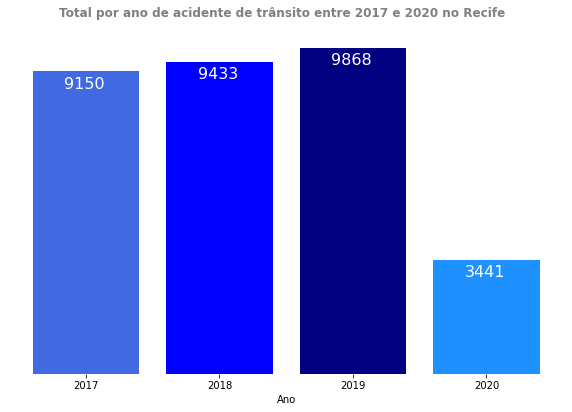

In [67]:
total_por_ano = df.groupby(df['ano']).size().reset_index().rename(columns={0: 'Total'}).set_index('ano')
def set_label_y_in_bar(fig):
    for b in fig:
        height_bar = b.get_height()
        ax.annotate(height_bar,
                    xy=(b.get_x() + b.get_width(),  height_bar),
                    xytext=(-55, -20),  # offset
                    textcoords="offset points",
                    ha='center',
                    va='bottom',
                    fontsize=16,
                    color="white",
                    )       
xs = total_por_ano.index
ys = total_por_ano['Total']
fig, ax = plt.subplots()  
barra_ano = ax.bar(xs, ys,color=['royalblue','b', 'navy', 'dodgerblue']) 
for spine in plt.gca().spines.values():
    spine.set_visible(False)
x_text_antes = -0.2
plt.gca().axes.get_yaxis().set_visible(False)
plt.text(x=x_text_antes, y=10802, s='Total por ano de acidente de trânsito entre 2017 e 2020 no Recife',
         fontsize=12, color='gray', weight='bold');
plt.xlabel('Ano')
 
plt.rcParams['axes.ymargin'] = False
plt.rcParams["axes.grid"] = False
plt.rcParams["figure.figsize"] = (10, 6)
%config InlineBackEnd.figure_format = 'svg'
set_label_y_in_bar(barra_ano)
plt.show()

In [68]:
#total de vitimas e vítimas fatais por ano
total_por_ano_vitimas = df.groupby(by=["ano"]).sum()
total_por_ano_vitimas = total_por_ano_vitimas.drop(columns=['auto', 'moto', 'ciclom', 'ciclista', 'pedestre', 'onibus', 'caminhao', 'viatura', 'outros'])
total_por_ano_vitimas['vitimas'] = total_por_ano_vitimas['vitimas'].values.astype(np.int64)
total_por_ano_vitimas['vitimasfatais'] = total_por_ano_vitimas['vitimasfatais'].values.astype(np.int64)
total_por_ano_vitimas.head()

,vitimas,vitimasfatais
ano,,
2017,2275,16
2018,2122,15
2019,2360,8
2020,1896,8


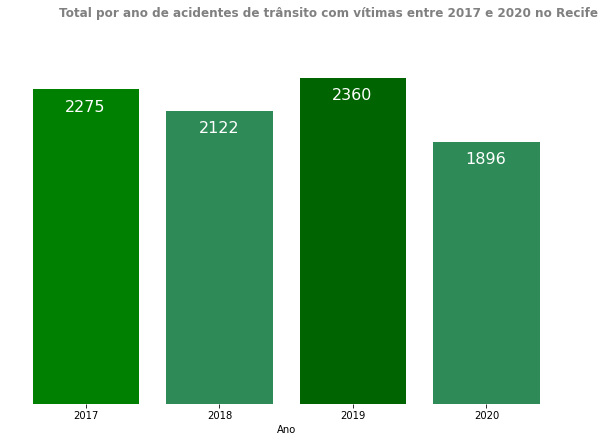

In [69]:
def set_label_y_in_bar(fig):
    for b in fig:
        height_bar = b.get_height()
        ax.annotate(height_bar,
                    xy=(b.get_x() + b.get_width(),  height_bar),
                    xytext=(-54, -25),  # offset
                    textcoords="offset points",
                    ha='center',
                    va='bottom',
                    fontsize=16,
                    color="white",
                    )       
xs = total_por_ano_vitimas.index
ys = total_por_ano_vitimas['vitimas']
fig, ax = plt.subplots()  
barra_ano = ax.bar(xs, ys, color=['green','seagreen', 'darkgreen', 'seagreen'])
plt.gca().axes.get_yaxis().set_visible(False)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
x_text_antes = -0.2
plt.text(x=x_text_antes, y=2802, s='Total por ano de acidentes de trânsito com vítimas entre 2017 e 2020 no Recife',
         fontsize=12, color='gray', weight='bold');
plt.xlabel('Ano')
plt.ylabel('Total')
plt.rcParams['axes.ymargin'] = False
plt.rcParams["axes.grid"] = False
plt.rcParams["figure.figsize"] = (10, 6)
%config InlineBackEnd.figure_format = 'svg'
set_label_y_in_bar(barra_ano)
plt.show()

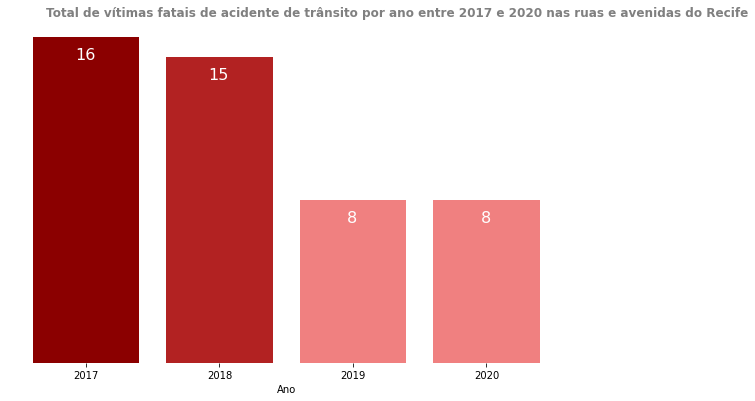

In [70]:
def set_label_y_in_bar(fig):
    for b in fig:
        height_bar = b.get_height()
        ax.annotate('{}'.format(height_bar),
                    xy=(b.get_x() + b.get_width(),  height_bar),
                    xytext=(-54, -25),  # offset
                    textcoords="offset points",
                    ha='center',
                    va='bottom',
                    fontsize=16,
                    color="white",
                    )       
xs = total_por_ano_vitimas.index
ys = total_por_ano_vitimas['vitimasfatais']
fig, ax = plt.subplots()  
barra_ano = ax.bar(xs, ys, color=['darkred','firebrick', 'lightcoral', 'lightcoral'])
plt.gca().axes.get_yaxis().set_visible(False)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

x_text_antes = -0.3
plt.text(x=x_text_antes, y=17, s='Total de vítimas fatais de acidente de trânsito por ano entre 2017 e 2020 nas ruas e avenidas do Recife',
         fontsize=12, color='gray', weight='bold');
  
plt.xlabel('Ano')
plt.ylabel('Total')
plt.rcParams['axes.ymargin'] = False
plt.rcParams["axes.grid"] = False
plt.rcParams["figure.figsize"] = (10, 6)
 
%config InlineBackEnd.figure_format = 'svg'
set_label_y_in_bar(barra_ano)
plt.show()

In [71]:
total_por_tipo = df.groupby(df['tipo']).size().reset_index().rename(columns={0: 'Total'}).set_index('tipo')
total_por_tipo.sort_values(by='Total', ascending=False)

,Total
tipo,
COLISÃO,16230
ABALROAMENTO LONGITUDINAL,5402
COLISÃO TRASEIRA,3832
ABALROAMENTO TRANSVERSAL,2733
ATROPELAMENTO,783
COLISÃO COM CICLISTA,553
CHOQUE VEÍCULO PARADO,547
COLISÃO FRONTAL,422
CHOQUE,419


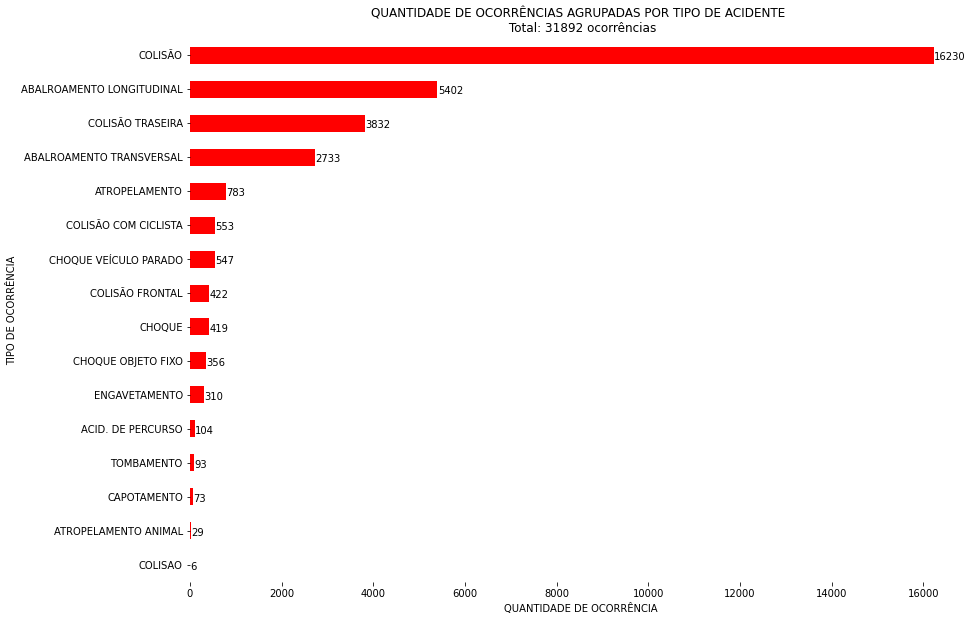

In [72]:
ax = total_por_tipo.groupby('tipo')['Total'].sum().sort_values().plot(kind='barh', color='red', figsize=(14,10))
for p in ax.patches:
    b=p.get_bbox()
    ax.annotate("{:.0f}".format(b.x1 + b.x0), (p.get_x() + p.get_width() + 5.8, p.get_y() + 0.1))
plt.title('QUANTIDADE DE OCORRÊNCIAS AGRUPADAS POR TIPO DE ACIDENTE \n Total: '  + str(total_por_tipo['Total'].sum()) +  ' ocorrências')
plt.ylabel('TIPO DE OCORRÊNCIA')
plt.xlabel('QUANTIDADE DE OCORRÊNCIA')
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.show()

In [73]:
total_por_bairro = df.groupby(df['bairro']).size().reset_index().rename(columns={0: 'Total'}).set_index('bairro')
total_por_bairro.sort_values(by='Total', ascending=False)

,Total
bairro,
BOA VIAGEM,3977
IMBIRIBEIRA,1990
SANTO AMARO,1504
BOA VISTA,1311
MADALENA,1289
...,...
CAÇOTE,17
BREJO DA GUABIRABA,16
BREJO DE BEBERIBE,16


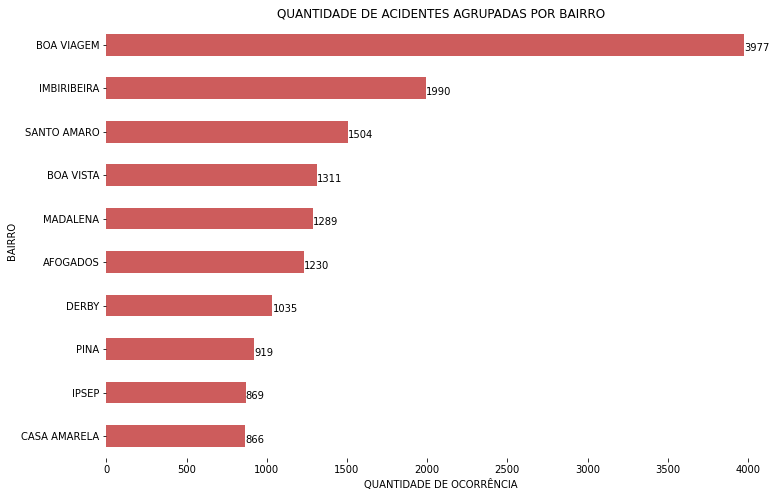

In [74]:
total_por_bairro = df.groupby(df['bairro']).size().reset_index().rename(columns={0: 'Total'}).set_index('bairro')
ax = total_por_bairro.groupby('bairro')['Total'].sum().sort_values(ascending=True).tail(10).plot(kind='barh', color='indianred', figsize=(12,8))
for p in ax.patches:
    b=p.get_bbox()
    ax.annotate("{:.0f}".format(b.x1 + b.x0), (p.get_x() + p.get_width() + 0.4, p.get_y() + 0.1))
plt.title('QUANTIDADE DE ACIDENTES AGRUPADAS POR BAIRRO')
plt.ylabel('BAIRRO')
plt.xlabel('QUANTIDADE DE OCORRÊNCIA')
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.show()

In [75]:
#total de vitimas fatais por tipo acidente
vitimas_fatais = df.loc[df['vitimasfatais'] >= 1]
vitimas_fatais.head(50)

,data,hora,natureza_acidente,situacao,bairro,endereco,numero,detalhe_endereco_acidente,complemento,tipo,auto,moto,ciclom,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimasfatais,ano,hora_acidente,periodo
1231,2017-02-11,05:37:00,VÍTIMA FATAL,FINALIZADA,ARRUDA,AV PROFESSOR JOSE DOS ANJOS,0,0,"CRUZAMENTO COM RUA PETRONILA BOTELHO, POR TRÁS...",CAPOTAMENTO,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2017,05,MADRUGADA
1258,2017-02-12,16:36:00,VÍTIMA FATAL,FINALIZADA,VASCO DA GAMA,AV NORTE,0,0,EM FRENTE A MATERNIDADE BARROS LIMA/ SENTIDO C...,CHOQUE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2017,16,TARDE
1653,2017-02-23,23:28:00,VÍTIMA FATAL,FINALIZADA,PINA,AV REPUBLICA ARABE UNIDA,0,0,PROX AO RIO MAR,ATROPELAMENTO,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2017,23,NOITE
3064,2017-04-09,13:07:00,VÍTIMA FATAL,FINALIZADA,IMBIRIBEIRA,AV MARECHAL MASCARENHAS DE MORAES,0,0,"EM LASER ELETRO, SEMAFORO 287",COLISÃO,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2017,13,TARDE
3088,2017-04-10,13:24:00,VÍTIMA FATAL,FINALIZADA,CASA AMARELA,AV NORTE,0,0,"LADO OPOSTO A MATERNIDADE BARROS LIMA, SENTIDO...",COLISÃO,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2017,13,TARDE
3253,2017-04-17,04:49:00,VÍTIMA FATAL,FINALIZADA,BOA VIAGEM,AV BOA VIAGEM,0,0,APÓS O CLUBE DOS OFICIAIS DA AERONAUTICA,CHOQUE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2017,04,MADRUGADA
3476,2017-04-24,17:51:00,VÍTIMA FATAL,FINALIZADA,CAXANGÁ,AV CAXANGA,0,0,EM FRENTE A DISNOVE,COLISÃO,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2017,17,TARDE
5096,2017-06-12,01:32:00,VÍTIMA FATAL,FINALIZADA,SANTO ANTÔNIO,AV GUARARAPES,0,0,AO LADO DOS CORREIOS,COLISÃO,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,2017,01,MADRUGADA
5344,2017-06-19,11:56:00,VÍTIMA FATAL,FINALIZADA,IPSEP,RUA JEAN EMILE FAVRE,0,0,"EM FRENTE A FACULDADE PERNAMBUCANA DE SAÚDE,E ...",COLISÃO,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2017,11,MANHÃ
7906,2017-09-07,20:39:00,VÍTIMA FATAL,FINALIZADA,CASA AMARELA,AV PROFESSOR JOSE DOS ANJOS,0,AV NORTE,CRUZ. COM A AV NORTE. SEMÁFORO 364,COLISÃO,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,2017,20,NOITE


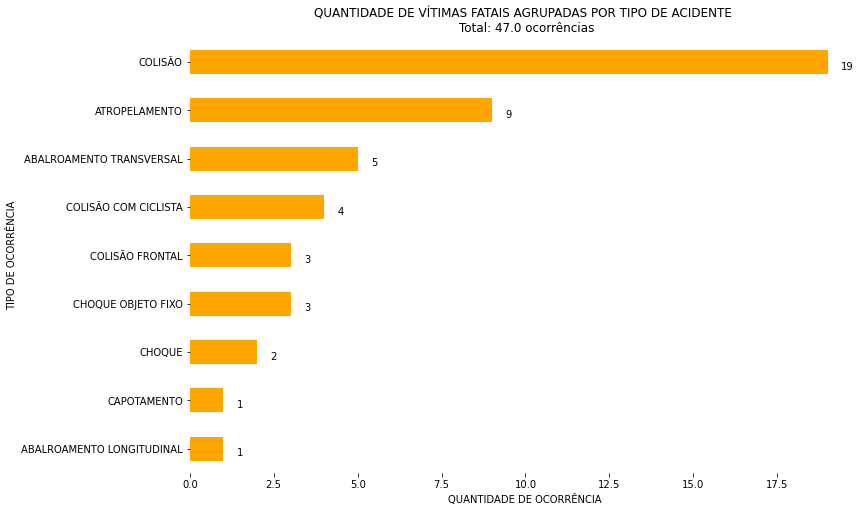

In [76]:
ax = vitimas_fatais.groupby('tipo')['vitimasfatais'].sum().sort_values().plot(kind='barh', color='orange', figsize=(12,8))
for p in ax.patches:
    b=p.get_bbox()
    ax.annotate("{:.0f}".format(b.x1 + b.x0), (p.get_x() + p.get_width() + 0.4, p.get_y() + 0.1))
plt.title('QUANTIDADE DE VÍTIMAS FATAIS AGRUPADAS POR TIPO DE ACIDENTE \n Total: '  + str(vitimas_fatais['vitimasfatais'].sum()) +  ' ocorrências')
plt.ylabel('TIPO DE OCORRÊNCIA')
plt.xlabel('QUANTIDADE DE OCORRÊNCIA')
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.show()

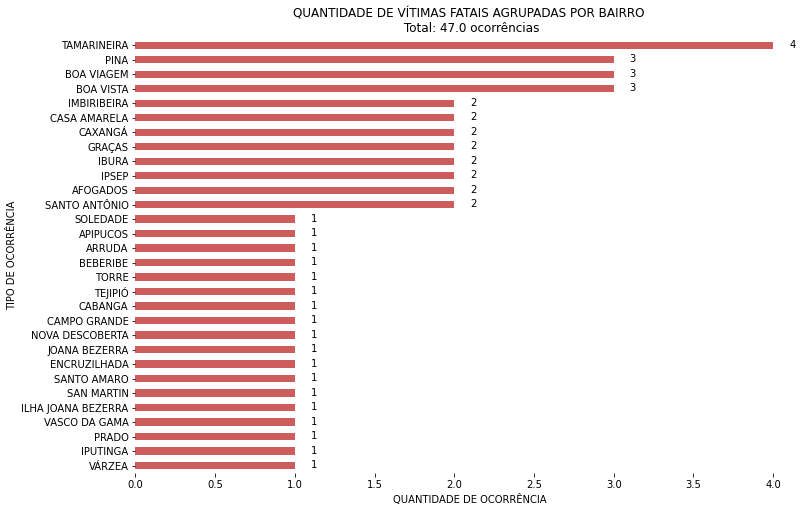

In [77]:
ax = vitimas_fatais.groupby('bairro')['vitimasfatais'].sum().sort_values().plot(kind='barh', color='indianred', figsize=(12,8))
for p in ax.patches:
    b=p.get_bbox()
    ax.annotate("{:.0f}".format(b.x1 + b.x0), (p.get_x() + p.get_width() + 0.1, p.get_y() + 0.1))
plt.title('QUANTIDADE DE VÍTIMAS FATAIS AGRUPADAS POR BAIRRO \n Total: '  + str(vitimas_fatais['vitimasfatais'].sum()) +  ' ocorrências')
plt.ylabel('TIPO DE OCORRÊNCIA')
plt.xlabel('QUANTIDADE DE OCORRÊNCIA')
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.show()

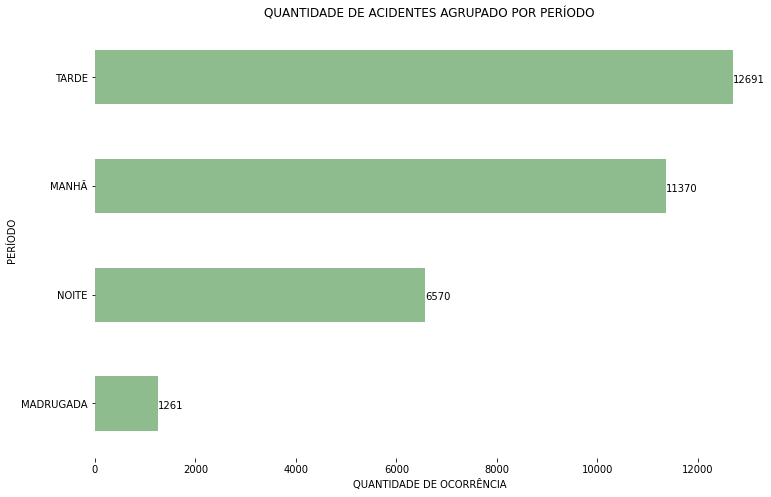

In [93]:
total_por_periodo = df.groupby(df['periodo']).size().reset_index().rename(columns={0: 'Total'}).set_index('periodo')
ax = total_por_periodo.groupby('periodo')['Total'].sum().sort_values(ascending=True).tail(10).plot(kind='barh', color='darkseagreen', figsize=(12,8))
for p in ax.patches:
    b=p.get_bbox()
    ax.annotate("{:.0f}".format(b.x1 + b.x0), (p.get_x() + p.get_width() + 0.5, p.get_y() + 0.2))
plt.title('QUANTIDADE DE ACIDENTES AGRUPADO POR PERÍODO')
plt.ylabel('PERÍODO')
plt.xlabel('QUANTIDADE DE OCORRÊNCIA')
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.show()

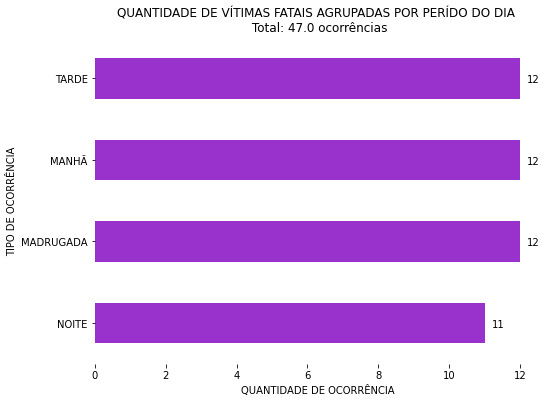

In [78]:
ax = vitimas_fatais.groupby('periodo')['vitimasfatais'].sum().sort_values().plot(kind='barh', color='darkorchid', figsize=(8,6))
for p in ax.patches:
    b=p.get_bbox()
    ax.annotate("{:.0f}".format(b.x1 + b.x0), (p.get_x() + p.get_width() + 0.2, p.get_y() + 0.2))
plt.title('QUANTIDADE DE VÍTIMAS FATAIS AGRUPADAS POR PERÍDO DO DIA \n Total: '  + str(vitimas_fatais['vitimasfatais'].sum()) +  ' ocorrências')
plt.ylabel('TIPO DE OCORRÊNCIA')
plt.xlabel('QUANTIDADE DE OCORRÊNCIA')
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.show()

**<h3> CONCLUSÃO </h3><br>**

- Recife teve 38.664 acidentes registrados entre 2017 e 2020, com uma média de 9.666 acidentes por ano.
- Devido a pandemia da Covid-19 e a restrição a circulação de pessoas, o ano de 2020 teve uma queda de mais de 60% no número de acidentes em relação a 2019.
- O bairro que tem mais acidentes em número absoluto é Boa Viagem com 3.977 acidentes de 2017 a 2020.
- O bairro do Recife que tem mais mortes em acidentes de trânsito entre 2017 e 2020 é o bairro da Tamarineira com 4 vítimas fatais.
- O período do dia em que menos ocorre acidentes com vítimas fatais na cidade do Recife é no período da noite (das 18:00 até as 23:59), com um total de 11 registros. 
- O tipo de acidente que mais ocorre é a colisão com  16.230 registros.
- O tipo de acidente que causa mais vítimas fatais é a colisão com 19 registros.


**<h3> FONTE DE DADOS </h3><br>**
http://dados.recife.pe.gov.br/it/dataset/acidentes-de-transito-com-e-sem-vitimas/resource/fc1c8460-0406-4fff-b51a-e79205d1f1ab

http://www.bde.pe.gov.br/visualizacao/Visualizacao_formato2.aspx?CodInformacao=824&Cod=3

https://cidades.ibge.gov.br/brasil/pe/recife/pesquisa/22/28120?ano=2017

https://cidades.ibge.gov.br/brasil/pe/recife/pesquisa/22/28120?ano=2018


https://www.gov.br/infraestrutura/pt-br/assuntos/transito/conteudo-denatran/frota-de-veiculos-2019

https://www.pdui-rmr.pe.gov.br/municipios

http://www2.recife.pe.gov.br/pagina/conhecendo-cidade

https://www.ibge.gov.br/cidades-e-estados/pe/recife.html
